In [12]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn.preprocessing import StandardScaler
from tqdm import trange, tqdm

In [13]:
# because it's a binary classification problem, there should be two output neurons.

# read data
df = pd.read_csv('data1forEx1to4/train1_icu_data.csv')
mm = StandardScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_label = pd.read_csv('data1forEx1to4/train1_icu_label.csv')

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y, y_hat):
    return 1 / 2 * np.sum((y - y_hat) ** 2)

# let's try to use 2 hidden layers
# input layer: 108 features = 108 neurons
# hidden layer 1: 50 neurons
# hidden layer 2: 20 neurons
# output layer: 1 neuron

In [15]:
def forward(x, w1, w2, w3, b1, b2, b3):
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3) + b3
    a3 = sigmoid(z3)
    return z1, a1, z2, a2, z3, a3

def backward(x, y, z1, a1, z2, a2, z3, a3, w1, w2, w3, b1, b2, b3):
    dz3 = a3 - y
    dw3 = np.dot(a2.T, dz3)
    db3 = np.sum(dz3, axis=0)
    dz2 = np.dot(dz3, w3.T) * a2 * (1 - a2)
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    dz1 = np.dot(dz2, w2.T) * a1 * (1 - a1)
    dw1 = np.dot(x.T, dz1)
    db1 = np.sum(dz1, axis=0)
    return dw1, dw2, dw3, db1, db2, db3

def update(w1, w2, w3, b1, b2, b3, dw1, dw2, dw3, db1, db2, db3, lr):
    w1 -= lr * dw1
    w2 -= lr * dw2
    w3 -= lr * dw3
    b1 -= lr * db1
    b2 -= lr * db2
    b3 -= lr * db3
    return w1, w2, w3, b1, b2, b3


def train(x, y, w1, w2, w3, b1, b2, b3, lr, epoch):
    for i in range(epoch):
        z1, a1, z2, a2, z3, a3 = forward(x, w1, w2, w3, b1, b2, b3)
        dw1, dw2, dw3, db1, db2, db3 = backward(x, y, z1, a1, z2, a2, z3, a3, w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = update(w1, w2, w3, b1, b2, b3, dw1, dw2, dw3, db1, db2, db3, lr)
    return w1, w2, w3, b1, b2, b3

def predict(x, w1, w2, w3, b1, b2, b3):
    _, _, _, _, _, a3 = forward(x, w1, w2, w3, b1, b2, b3)
    return a3

def accuracy(y, y_hat):
    y_hat = np.where(y_hat > 0.5, 1, 0)
    return np.sum(y == y_hat) / len(y)

In [29]:
def cross_validation(x, y, k, lr, epoch):
    n = len(x)
    fold_size = n // k
    acc = []

    for i in trange(k):
        x_val = x[i * fold_size: (i + 1) * fold_size]
        y_val = y[i * fold_size: (i + 1) * fold_size]
        x_train = np.concatenate((x[:i * fold_size], x[(i + 1) * fold_size:]))
        y_train = np.concatenate((y[:i * fold_size], y[(i + 1) * fold_size:]))

        rs = RandomState(seed=1709)
        w1 = rs.randn(108, 50)
        w2 = rs.randn(50, 20)
        w3 = rs.randn(20, 1)
        b1 = rs.randn(50)
        b2 = rs.randn(20)
        b3 = rs.randn(1)

        w1, w2, w3, b1, b2, b3 = train(x_train, y_train, w1, w2, w3, b1, b2, b3, lr, epoch)
        y_hat = predict(x_val, w1, w2, w3, b1, b2, b3)
        acc.append(accuracy(y_val, y_hat))
    return acc

x = df.values
y = df_label.values
k = 5
lr = 0.01
epoch = 1000
acc = cross_validation(x, y, k, lr, epoch)
print('accuracy:', acc)

100%|██████████| 5/5 [00:59<00:00, 11.83s/it]

accuracy: [0.767, 0.505, 0.81, 0.774, 0.768]


In [30]:
rs = RandomState(seed=1709)

w1 = rs.randn(108, 50)
w2 = rs.randn(50, 20)
w3 = rs.randn(20, 1)
b1 = rs.randn(50)
b2 = rs.randn(20)
b3 = rs.randn(1)

w1, w2, w3, b1, b2, b3 = train(x, y, w1, w2, w3, b1, b2, b3, lr, epoch)

df_test = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
df_test_label = pd.read_csv('data1forEx1to4/test1_icu_label.csv')
y_hat = predict(df_test.values, w1, w2, w3, b1, b2, b3)
print('train accuracy:', accuracy(df_label.values, predict(df.values, w1, w2, w3, b1, b2, b3)))
print('test accuracy:', accuracy(df_test_label.values, y_hat))

/var/folders/7p/v3y46gtj3z7dpy01w3qjp3xm0000gn/T/ipykernel_1089/2982537270.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


train accuracy: 0.8386
test accuracy: 0.5013673655423884


In [31]:
lr_list = [0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]
acc_training = []
acc_test = []

for lr in tqdm(lr_list):
    rs = RandomState(seed=1709)

    w1 = rs.randn(108, 50)
    w2 = rs.randn(50, 20)
    w3 = rs.randn(20, 1)
    b1 = rs.randn(50)
    b2 = rs.randn(20)
    b3 = rs.randn(1)

    w1, w2, w3, b1, b2, b3 = train(x, y, w1, w2, w3, b1, b2, b3, lr, epoch)
    acc = accuracy(df_label.values, predict(df.values, w1, w2, w3, b1, b2, b3))
    acc_training.append(acc)

    y_hat = predict(df_test.values, w1, w2, w3, b1, b2, b3)
    acc = accuracy(df_test_label.values, y_hat)
    acc_test.append(acc)

  0%|          | 0/9 [00:00<?, ?it/s]/var/folders/7p/v3y46gtj3z7dpy01w3qjp3xm0000gn/T/ipykernel_1089/2982537270.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
100%|██████████| 9/9 [01:56<00:00, 12.93s/it]


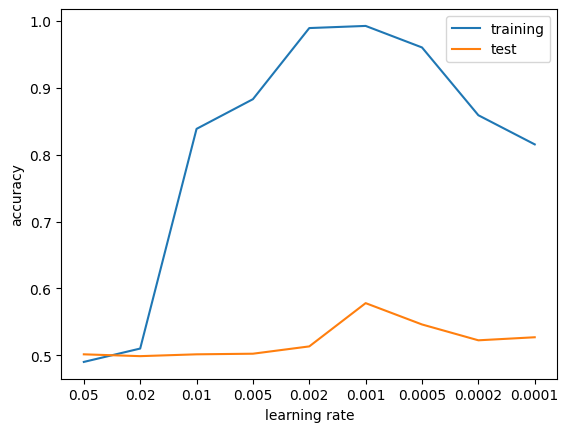

In [33]:
plt.plot(acc_training, label='training')
plt.plot(acc_test, label='test')
plt.legend()
plt.xticks(np.arange(len(lr_list)), [str(item) for item in lr_list])
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.savefig('lr.png', dpi=180)
plt.show()